In this kernal i'm going to create a predictive model for covid19 global-forecasting week 5 data which contains around 7 lakhs data for  training and we have to predict the target values for 3 lakhs test data

In this model first i have did some analysis with the data with some graphs and also the the effect of corona in  India have been analysed seperately.

Finally I created a ensemble learning model with almost 0.96 Rsquared score

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-global-forecasting-week-5/train.csv
/kaggle/input/covid19-global-forecasting-week-5/submission.csv
/kaggle/input/covid19-global-forecasting-week-5/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-5/train.csv')
test = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-5/test.csv')

In [3]:
train.head(3)

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0.0
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0.0
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0.0


In [4]:
import seaborn as sns

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748008 entries, 0 to 748007
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Id              748008 non-null  int64  
 1   County          678888 non-null  object 
 2   Province_State  707616 non-null  object 
 3   Country_Region  748008 non-null  object 
 4   Population      748008 non-null  int64  
 5   Weight          748008 non-null  float64
 6   Date            748008 non-null  object 
 7   Target          748008 non-null  object 
 8   TargetValue     748008 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 51.4+ MB


# <center>Top 20 in Population</center>

In [6]:
df1 = train.Population.groupby(train['Country_Region']).max().sort_values(ascending= False)
df10 = pd.DataFrame()
df20 = pd.DataFrame()
df10['population'] = df1.iloc[0:10]
df10['country']= df10.index
df20['population'] = df1.iloc[11:20]
df20['country'] = df20.index

Text(0.5, 1.0, 'Population Next 10')

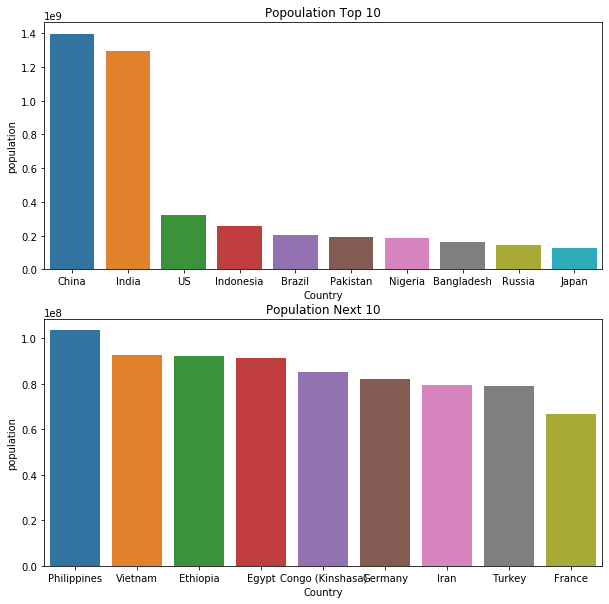

In [7]:
plt.figure(figsize =(10,10))
plt.subplot(2,1,1)
sns.barplot(x='country', y='population', data=df10, orient ='v')
plt.xlabel('Country')
plt.title('Popoulation Top 10')
plt.subplot(2,1,2)
sns.barplot(x='country', y='population', data=df20, orient ='v')
plt.xlabel('Country')
plt.title('Population Next 10')

# <center>Top 20 in Confirmed Cases</center>

In [8]:
train1= train[train['Target']=='ConfirmedCases']
data1 = pd.DataFrame()
data1['values'] =train1.TargetValue.groupby(train1['Country_Region']).sum().sort_values(ascending= False)
data1['country'] = data1.index
data1.index = np.arange(0,len(data1))
data10 = data1.iloc[0:10,:]
data20 = data1.iloc[11:20,:]

Text(0.5, 1.0, 'Covid Cases Next 10')

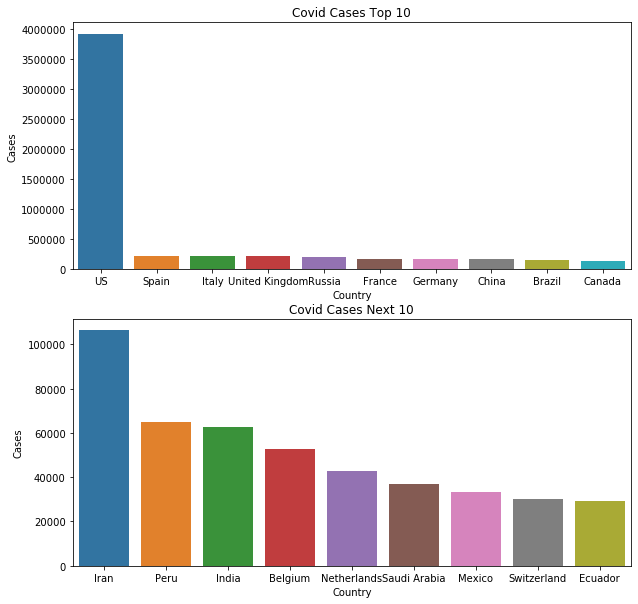

In [9]:
plt.figure(figsize =(10,10))
plt.subplot(2,1,1)
sns.barplot(x='country', y='values', data=data10, orient ='v')
plt.xlabel('Country')
plt.ylabel('Cases')
plt.title('Covid Cases Top 10')
plt.subplot(2,1,2)
sns.barplot(x='country', y='values', data=data20, orient ='v')
plt.xlabel('Country')
plt.ylabel('Cases')
plt.title('Covid Cases Next 10')

# <center>Top 20 in Deaths</center>

In [10]:
train1= train[train['Target']!='ConfirmedCases']
data1 = pd.DataFrame()
data1['values'] =train1.TargetValue.groupby(train1['Country_Region']).sum().sort_values(ascending= False)
data1['country'] = data1.index
data1.index = np.arange(0,len(data1))
data10 = data1.iloc[0:10,:]
data20 = data1.iloc[11:20,:]

Text(0.5, 1.0, 'Covid Cases Next 10')

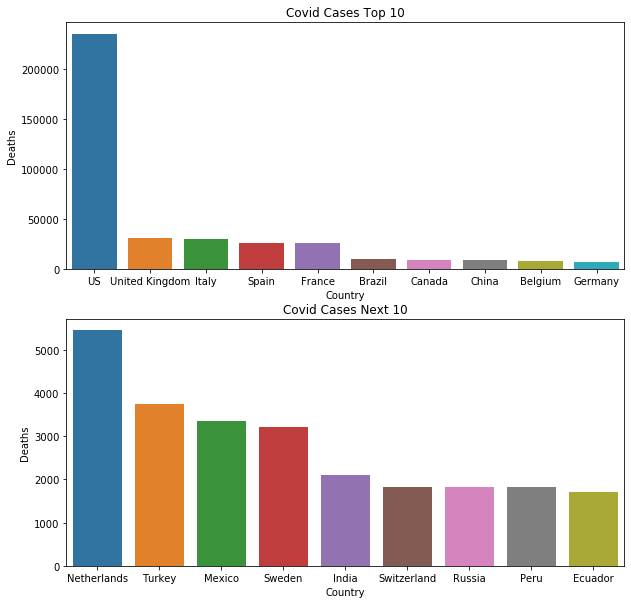

In [11]:
plt.figure(figsize =(10,10))
plt.subplot(2,1,1)
sns.barplot(x='country', y='values', data=data10, orient ='v')
plt.xlabel('Country')
plt.ylabel('Deaths')
plt.title('Covid Cases Top 10')
plt.subplot(2,1,2)
sns.barplot(x='country', y='values', data=data20, orient ='v')
plt.xlabel('Country')
plt.ylabel('Deaths')
plt.title('Covid Cases Next 10')

# <center>Fatalities vs Confirmed cases(WW)</center>

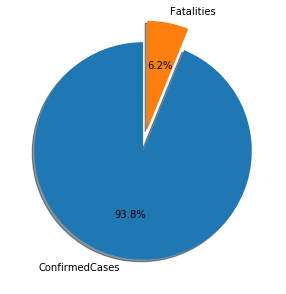

In [12]:
df = train['TargetValue'].groupby(train['Target']).sum()
labels =[df.index[0],df.index[1]]
sizes = [df[0],df[1]]
explode = (0, 0.2)  

plt.figure(figsize = (5,5))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

# <center>Analysing the cases in India</center>

In [13]:
india = train[train['Country_Region']=='India']

In [14]:
india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 31104 to 31319
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              216 non-null    int64  
 1   County          0 non-null      object 
 2   Province_State  0 non-null      object 
 3   Country_Region  216 non-null    object 
 4   Population      216 non-null    int64  
 5   Weight          216 non-null    float64
 6   Date            216 non-null    object 
 7   Target          216 non-null    object 
 8   TargetValue     216 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 16.9+ KB


In [15]:
india.drop(['County','Province_State'],axis =1,inplace =True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
india.head(2)

,Id,Country_Region,Population,Weight,Date,Target,TargetValue
31104,40321,India,1295210000,0.04766,2020-01-23,ConfirmedCases,0.0
31105,40322,India,1295210000,0.47660,2020-01-23,Fatalities,0.0


In [17]:
india.index = np.arange(0,len(india)) #rechanging the index

In [18]:
india.head(2)

,Id,Country_Region,Population,Weight,Date,Target,TargetValue
0,40321,India,1295210000,0.04766,2020-01-23,ConfirmedCases,0.0
1,40322,India,1295210000,0.47660,2020-01-23,Fatalities,0.0


In [19]:
ind = india[india['Target']=='ConfirmedCases']
ind.index = np.arange(0,len(ind))

In [20]:
ind.head(2)

,Id,Country_Region,Population,Weight,Date,Target,TargetValue
0,40321,India,1295210000,0.04766,2020-01-23,ConfirmedCases,0.0
1,40323,India,1295210000,0.04766,2020-01-24,ConfirmedCases,0.0


In [21]:
print("Date with more no.of cases in india {}".format((ind[ind['TargetValue']==ind['TargetValue'].max()]['Date']).values))
print("The cases are {}".format((ind[ind['TargetValue']==ind['TargetValue'].max()]['TargetValue']).values))

Date with more no.of cases in india ['2020-05-04']
The cases are [3932.]


In [22]:
list1 = []
for i in range(2,7):
    date = '2020'+'-0'+str(i)+'-01'
    list1.append(ind[ind['Date']<date]['TargetValue'].sum())
print(list1)

[1.0, 3.0, 1397.0, 34863.0, 62808.0]


# <center>Monthly Progression of disease </center>

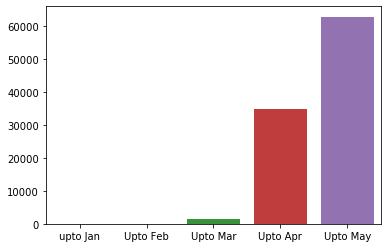

In [23]:
sns.barplot(['upto Jan','Upto Feb','Upto Mar', 'Upto Apr','Upto May'],list1)

In [24]:
list2 =[]
for i in range(len(list1)):
    if i ==0:
        list2.append(list1[i])
    else:
        list2.append(list1[i]-list1[i-1])
print(list2)

[1.0, 2.0, 1394.0, 33466.0, 27945.0]


# <center>Count per month</center>

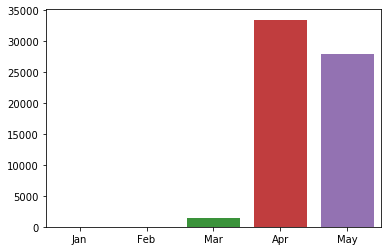

In [25]:
labels =['Jan','Feb','Mar','Apr','May']
sns.barplot(labels,list2)

# <center>Fatalities vs Confirmed cases(India)</center>

In [26]:
df = india['TargetValue'].groupby(train['Target']).sum()
df

Target
ConfirmedCases    62808.0
Fatalities         2101.0
Name: TargetValue, dtype: float64

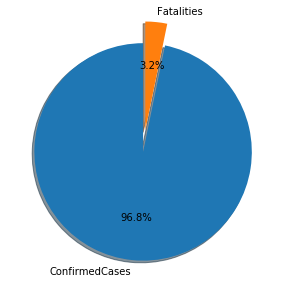

In [27]:
labels =[df.index[0],df.index[1]]
sizes = [df[0],df[1]]
explode = (0, 0.2)  
plt.figure(figsize = (5,5))

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

In [28]:
wor = train[train['Target']=='ConfirmedCases']

In [29]:
print("Date with more no.of cases  {}".format((wor[wor['TargetValue']==wor['TargetValue'].max()]['Date']).values))
print("The cases are {}".format((wor[wor['TargetValue']==wor['TargetValue'].max()]['TargetValue']).values))
print("The Country is {}".format((wor[wor['TargetValue']==wor['TargetValue'].max()]['Country_Region']).values))

Date with more no.of cases  ['2020-04-24']
The cases are [36163.]
The Country is ['US']


In [30]:
wor.columns

Index(['Id', 'County', 'Province_State', 'Country_Region', 'Population', 'Weight', 'Date', 'Target', 'TargetValue'], dtype='object')

In [31]:
independent_columns = ['Country_Region','Weight','Target','Date']
dependent_column = ['TargetValue']

In [32]:
X= train[independent_columns]
y = train[dependent_column]

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Target']=le.fit_transform(X['Target'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748008 entries, 0 to 748007
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country_Region  748008 non-null  object 
 1   Weight          748008 non-null  float64
 2   Target          748008 non-null  int64  
 3   Date            748008 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 22.8+ MB


# <center>Encoding Country according to it's rank in no.of confirmed cases</center>

In [35]:
train1= train[train['Target']=='ConfirmedCases']
data1 = pd.DataFrame()
data1['values'] =train1.TargetValue.groupby(train1['Country_Region']).sum().sort_values(ascending= False)
data1['country'] = data1.index

In [36]:
k = len(data1['country'])
dict1 = {}
for i in data1['country']:
    dict1[i] = k
    k =k-1

In [37]:
list1=[]
X['encoded_country']=0
for i in X['Country_Region']:
    list1.append(dict1[i])
X['encoded_country'] = list1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [38]:
X['encoded_country'].value_counts()

187    690768
180      7344
178      2808
184      2376
182      2376
152      1944
172      1080
147       648
64        216
63        216
62        216
61        216
60        216
59        216
58        216
57        216
55        216
56        216
66        216
54        216
53        216
52        216
51        216
50        216
49        216
48        216
47        216
65        216
69        216
67        216
79        216
88        216
87        216
86        216
85        216
84        216
83        216
82        216
81        216
80        216
78        216
68        216
77        216
76        216
75        216
74        216
73        216
72        216
71        216
70        216
45        216
46        216
41        216
44        216
43        216
20        216
19        216
18        216
17        216
16        216
15        216
14        216
13        216
12        216
11        216
10        216
9         216
8         216
7         216
6         216
5         216
4     

# <center> Picking out date and month seperately</center>

In [39]:
X['date_dup'] = pd.to_datetime(X['Date'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
X['month'] = 0
list1=[]
for i in X['date_dup']:
    list1.append(i.month)
X['month'] = list1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [41]:
X['date'] = 0
list1=[]
for i in X['date_dup']:
    list1.append(i.day)
X['date'] = list1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [42]:
X.head(2)

,Country_Region,Weight,Target,Date,encoded_country,date_dup,month,date
0,Afghanistan,0.058359,0,2020-01-23,127,2020-01-23,1,23
1,Afghanistan,0.583587,1,2020-01-23,127,2020-01-23,1,23


In [43]:
X.drop(['Country_Region','Date','date_dup'],axis =1,inplace =True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
X.head(2)

,Weight,Target,encoded_country,month,date
0,0.058359,0,127,1,23
1,0.583587,1,127,1,23


# <center> Seeing the Correleation</center>

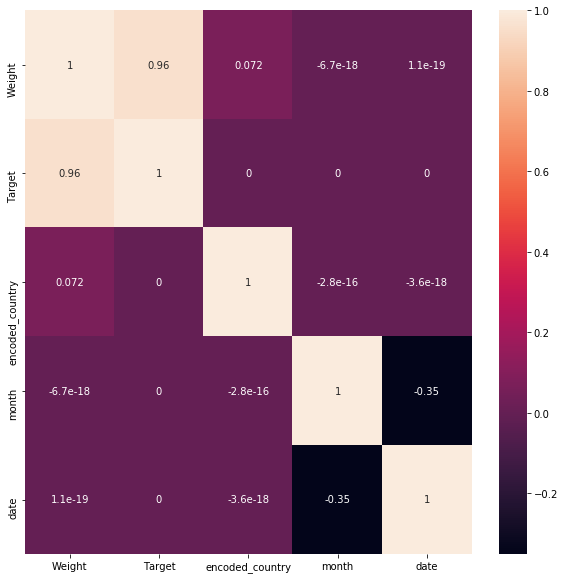

In [45]:
plt.figure(figsize =(10,10))
sns.heatmap(X.corr(),annot=True)

In [46]:
from sklearn.model_selection import train_test_split as tts

In [47]:
max_range =10

In [48]:
from sklearn.ensemble import RandomForestRegressor as regr
from sklearn.metrics import r2_score

# Actually I did some processing to find the best random state and I commented because it takes so much time to run
BEST RANDOM STATE:7

In [49]:
'''for i in range(max_range):
    X_train,X_test,y_train,y_test = tts(X,y,test_size =0.3,random_state =i)
    model = regr()
    model.fit(X_train,y_train)
    print("Random state {}\n".format(i))
    print(r2_score(y_test,model.predict(X_test)))'''

'for i in range(max_range):\n    X_train,X_test,y_train,y_test = tts(X,y,test_size =0.3,random_state =i)\n    model = regr()\n    model.fit(X_train,y_train)\n    print("Random state {}\n".format(i))\n    print(r2_score(y_test,model.predict(X_test)))'

In [50]:
X_train,X_test,y_train,y_test = tts(X,y,test_size =0.3,random_state =7)
model = regr()
model.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [51]:
print(r2_score(y_test,model.predict(X_test)))

0.9537118678170063


# <center>Preprocessing the test data in the same way we did for training data</center>

In [52]:
test = test[independent_columns]

In [53]:
list1=[]
test['encoded_country']=0
for i in test['Country_Region']:
    list1.append(dict1[i])
test['encoded_country'] = list1

In [54]:
test['date_dup'] = pd.to_datetime(test['Date'])

In [55]:
test['month'] = 0
list1=[]
for i in test['date_dup']:
    list1.append(i.month)
test['month'] = list1

In [56]:
test['date'] = 0
list1=[]
for i in test['date_dup']:
    list1.append(i.day)
test['date'] = list1

In [57]:
test.head(2)

,Country_Region,Weight,Target,Date,encoded_country,date_dup,month,date
0,Afghanistan,0.058359,ConfirmedCases,2020-04-27,127,2020-04-27,4,27
1,Afghanistan,0.583587,Fatalities,2020-04-27,127,2020-04-27,4,27


In [58]:
test.drop(['Country_Region','Date','date_dup'],axis =1,inplace =True)

In [59]:
test.head(2)

,Weight,Target,encoded_country,month,date
0,0.058359,ConfirmedCases,127,4,27
1,0.583587,Fatalities,127,4,27


In [60]:
le1 =LabelEncoder()
test['Target'] = le1.fit_transform(test['Target'])

In [61]:
pred = model.predict(test)

In [62]:
t =pd.read_csv('/kaggle/input/covid19-global-forecasting-week-5/test.csv')
ss = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-5/submission.csv')

In [63]:
output = pd.DataFrame({'Id': t.ForecastId  , 'TargetValue': pred})

In [64]:
a=output.groupby(['Id'])['TargetValue'].quantile(q=0.05).reset_index()
b=output.groupby(['Id'])['TargetValue'].quantile(q=0.5).reset_index()
c=output.groupby(['Id'])['TargetValue'].quantile(q=0.95).reset_index()

In [65]:
a.columns=['Id','q0.05']
b.columns=['Id','q0.5']
c.columns=['Id','q0.95']
a=pd.concat([a,b['q0.5'],c['q0.95']],1)
a['q0.05']=a['q0.05']
a['q0.5']=a['q0.5']
a['q0.95']=a['q0.95']

In [66]:
sub=pd.melt(a, id_vars=['Id'], value_vars=['q0.05','q0.5','q0.95'])
sub['variable']=sub['variable'].str.replace("q","", regex=False)
sub['ForecastId_Quantile']=sub['Id'].astype(str)+'_'+sub['variable']
sub['TargetValue']=sub['value']
sub=sub[['ForecastId_Quantile','TargetValue']]
sub.reset_index(drop=True,inplace=True)
sub.to_csv("submission.csv",index=False)
sub.head()

,ForecastId_Quantile,TargetValue
0,1_0.05,132.65
1,2_0.05,5.22
2,3_0.05,147.24
3,4_0.05,2.53
4,5_0.05,120.59


In [67]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935010 entries, 0 to 935009
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ForecastId_Quantile  935010 non-null  object 
 1   TargetValue          935010 non-null  float64
dtypes: float64(1), object(1)
memory usage: 14.3+ MB
